# Explore data augmentations

This notebook will be used to test different data augmentation strategies. In your config file, you can modify the augmentations by adding `data_augmentation_options`. For example, I would like to add a random RGB to gray transform with a probability of 0.2:
```
data_augmentation_options {
    random_rgb_to_gray {
    probability: 0.2
    }
```

A complete list of augmentation is provided the [`preprocessor.proto` file of the Tf Object Detection API](https://github.com/tensorflow/models/blob/master/research/object_detection/protos/preprocessor.proto).

### Helper functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

In [2]:
def recenter_image(image):
    # ssd preprocessing
    image += [123.68, 116.779, 103.939]
    return image

def display_instances(image, bboxes, classes):
    image = recenter_image(image)
    w, h, _ = image.shape
    # resize the bboxes
    bboxes[:, [0, 2]] *= w
    bboxes[:, [1, 3]] *= h
    
    f, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image.astype(np.uint8))
    for bb, cl in zip(bboxes, classes):
        y1, x1, y2, x2 = bb
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='r', linewidth=2)
        ax.add_patch(rec)
    plt.show()

def display_batch(batch):
    # get images, bboxes and classes
    batched_images = batch[0]['image'].numpy()
    batched_bboxes = batch[1]['groundtruth_boxes'].numpy()
    batched_classes = batch[1]['groundtruth_classes'].numpy()
    num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
    batch_size = batched_images.shape[0]
    for idx in range(batch_size):
        display_instances(batched_images[idx, ...], 
                          batched_bboxes[idx, :num_bboxes[idx], :],
                          batched_classes[idx, ...])

### Display augmentations

In [3]:
from utils import get_train_input

2023-02-09 21:15:46.859958: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-09 21:15:47.530002: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/extras/CUPTI/lib64:/usr/local/cuda-11.2/lib64:
2023-02-09 21:15:47.530104: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/extras/CUPTI/lib64:/usr/local/cuda-11.2/l

In [5]:
train_dataset = get_train_input("./experiments/reference/pipeline_new.config")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/segment-11318901554551149504_520_000_540_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10275144660749673822_5755_561_5775_561_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11076364019363412893_1711_000_1731_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10964956617027590844_1584_680_1604_680_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10075870402459732738_1060_000_1080_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11847506886204460250_1640_000_1660_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11588853832866011756_2184_462_2204_462_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-1172406780360799916_1660_000_1680_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11113047206980595400_2560_000_2580_000_with_camera_labels.tfrecord', '/home/works

INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/segment-11318901554551149504_520_000_540_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10275144660749673822_5755_561_5775_561_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11076364019363412893_1711_000_1731_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10964956617027590844_1584_680_1604_680_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10075870402459732738_1060_000_1080_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11847506886204460250_1640_000_1660_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11588853832866011756_2184_462_2204_462_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-1172406780360799916_1660_000_1680_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11113047206980595400_2560_000_2580_000_with_camera_labels.tfrecord', '

INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


2023-02-09 21:17:06.764732: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-09 21:17:06.772713: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-09 21:17:06.773122: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-09 21:17:06.773611: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, 

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.
Instructions for updating:
Use `tf.cast` instead.


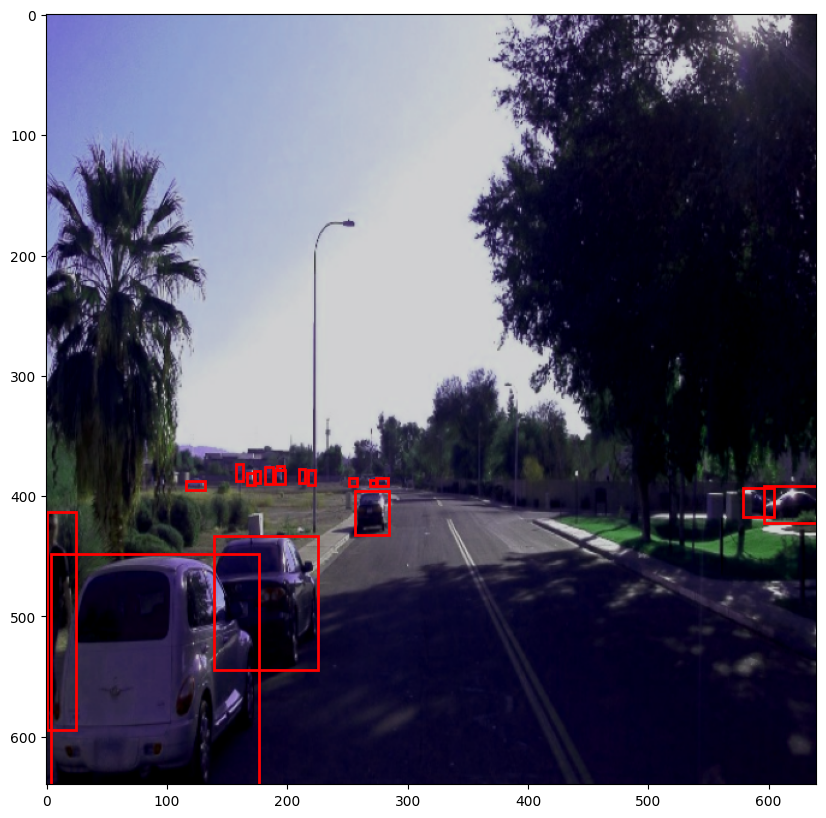

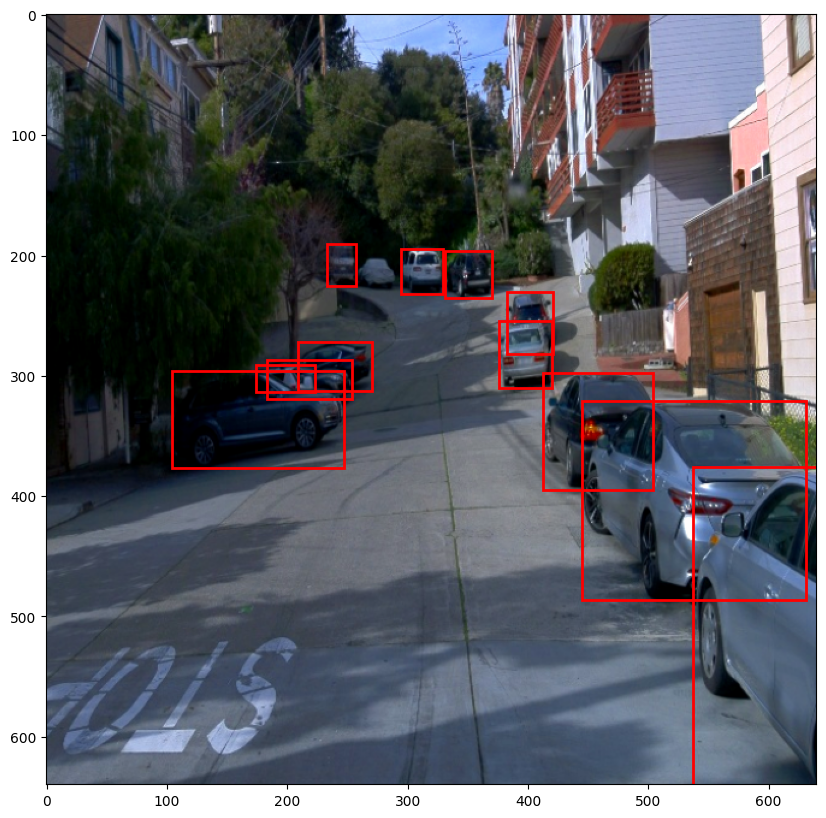

In [6]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)